In [1]:
from pycaret.classification import *
from pycaret.datasets import get_data

### Dataset

In [2]:
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 초기 설정

In [12]:
s = setup(
    data = data, target='species',
    session_id=123,              # 랜덤 시드 (해당 ID를 통해 결과 재현 가능)
    normalize=False,             # 데이터 정규화 유무
    # normalize_method='minmax', # 데이터 정규화 방법 (zscore, minmax, maxabs, robust)
    transformation=False,        # Power Transformation 유무
    fold=10,                     # Cross-Validation fold 수
    use_gpu=False                # GPU 사용 유무
)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


### Model 학습

In [13]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:38:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0120
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.0190
qda,Quadratic Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0100
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0080
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.0660
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0090
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.0390
gbc,Gradient Boosting Classifier,0.9355,0.0000,0.9355,0.9416,0.9325,0.9023,0.9083,0.0630
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0080
rf,Random Forest Classifier,0.9264,0.9909,0.9264,0.9343,0.9232,0.8886,0.8956,0.0440


In [17]:
lr = create_model('lr')
tuned_model = tune_model(lr, n_iter=10, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Model 시각화

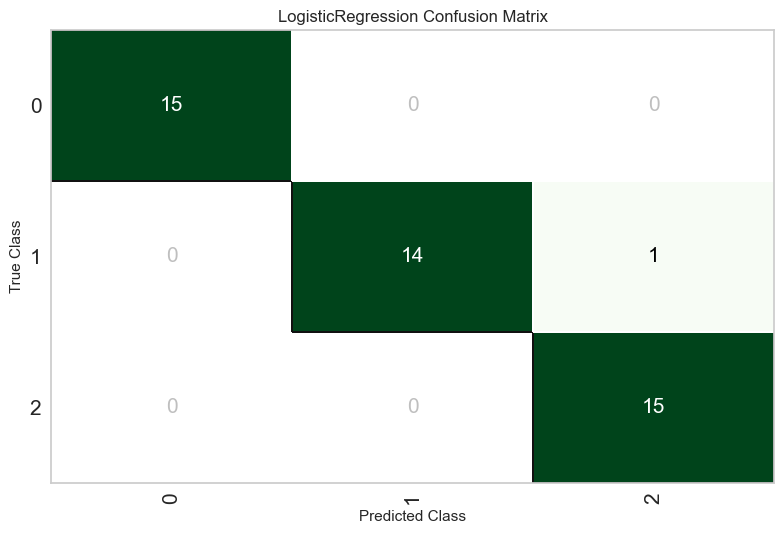

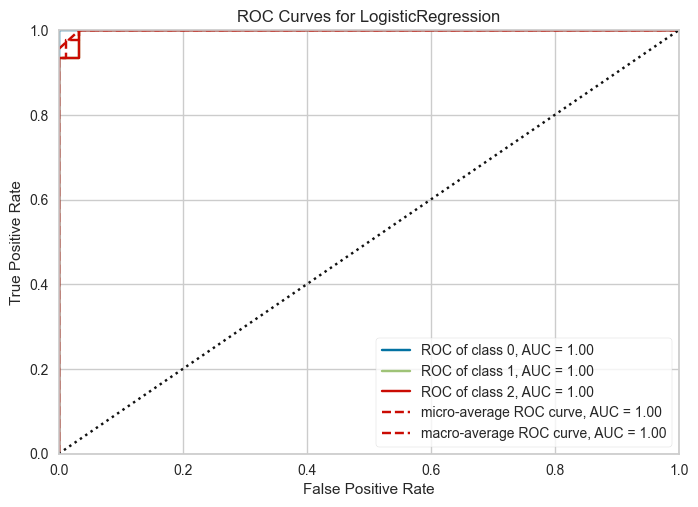

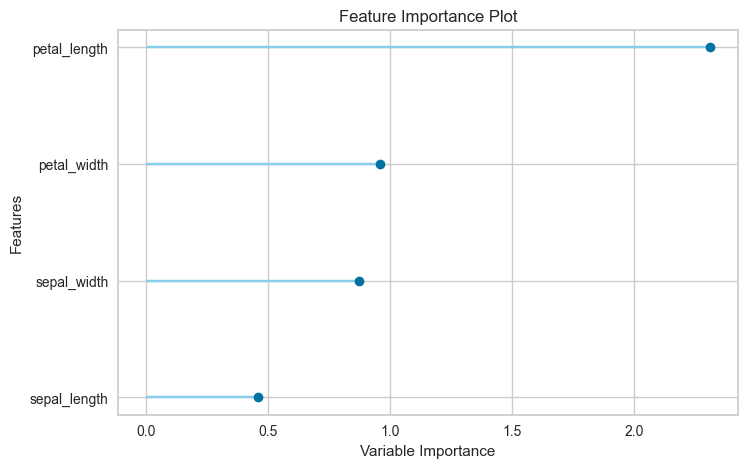

In [14]:
plot_model(best, plot = 'confusion_matrix')
plot_model(best, plot = 'auc')
plot_model(best, plot = 'feature')

### Prediction

In [15]:
holdout_pred = predict_model(best)
holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9778,0.9985,0.9778,0.9792,0.9778,0.9667,0.9674


,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
72,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-versicolor,0.5203
125,7.2,3.2,6.0,1.8,Iris-virginica,Iris-virginica,0.9503
80,5.5,2.4,3.8,1.1,Iris-versicolor,Iris-versicolor,0.9334
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor,0.7320
117,7.7,3.8,6.7,2.2,Iris-virginica,Iris-virginica,0.9953


### Model Save & Load


In [18]:
save_model(best, 'iris_pipeline')

loaded_best_pipeline = load_model('iris_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\BMILab\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)